<a href="https://colab.research.google.com/github/marceloasc/Estrutura_de_Dados_Avancadas/blob/main/ArvoreAvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyparsing.core import White
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [ ]:
class NoAvl:

  def __init__(self, info=None, dir=None, esq=None, pai=None, hd=0, he=0, balanco=0): 
      self.info = info
      self.dir = dir
      self.esq = esq
      self.pai = pai
      self.hd = hd
      self.he = he
      self.balanco = balanco



  def calc_he(self, no):
    if no == None:
      return
    else:
      self.he += 1
      self.calc_he(no.esq)
   


  def calc_hd(self, no):
    if no == None:
      return
    else:
      self.hd += 1
      self.calc_hd(no.dir)

In [ ]:
class ArvoreAvl:
  
  def __init__(self):
    self.raiz = None
    self.view = nx.DiGraph()



  def inserir(self, No, raiz):

    if raiz is None: 
      self.raiz = No
      self.view.add_node(No.info)
      self.raiz.pai = None

    else:
      if No.info < raiz.info: 
        if raiz.esq is None: 
          raiz.esq = No
          raiz.esq.pai = raiz
          self.monitora_balanco(self.raiz.esq) 
          self.view.add_edge(raiz.info, No.info)
        else:
          self.inserir(No, raiz.esq) 

      elif No.info > raiz.info:
        if raiz.dir is None:
          raiz.dir = No
          raiz.dir.pai = raiz
          self.monitora_balanco(self.raiz.dir)
          self.view.add_edge(raiz.info, No.info)
        else:
          self.inserir(No, raiz.dir)


  
  def rotacao_simples_esquerda(self, pivo):
    if pivo == self.raiz: 
      if self.raiz.dir.esq is None: 
        self.raiz = pivo.dir 
        self.raiz.esq = pivo
        self.raiz.esq.pai = self.raiz
        self.raiz.pai = None
        self.raiz.esq.dir = None
      else:
        filho_esquerdo_raiz = self.raiz.dir.esq 
        filho_esquerdo_raiz.pai = pivo
        self.raiz = pivo.dir
        self.raiz.esq = pivo
        self.raiz.esq.pai = self.raiz
        self.raiz.esq.dir = filho_esquerdo_raiz
        self.raiz.pai = None
    else:
      pai_pivo = pivo.pai
      pivo_esq = pivo
      pivo = pivo.dir
      pivo.esq = pivo_esq
      pivo.pai = pai_pivo
      pivo.pai.dir = pivo
      pivo.esq.pai = pivo
      pivo.esq.dir = None



  def rotacao_simples_direita(self, pivo):
    if pivo == self.raiz:
      if self.raiz.esq.dir is None:
        self.raiz = pivo.esq
        self.raiz.dir = pivo
        self.raiz.dir.pai = self.raiz
        self.raiz.pai = None
        self.raiz.dir.esq = None
      else:
        filho_direito_raiz = self.raiz.esq.dir
        filho_direito_raiz.pai = pivo
        self.raiz = pivo.esq
        self.raiz.dir = pivo
        self.raiz.dir.pai = self.raiz
        self.raiz.dir.esq = filho_direito_raiz
        self.raiz.pai = None
    else:
      pai_pivo = pivo.pai
      pivo_dir = pivo
      pivo = pivo.esq
      pivo.dir = pivo_dir
      pivo.pai = pai_pivo
      pivo.pai.esq = pivo
      pivo.dir.pai = pivo
      pivo.dir.esq = None



  def monitora_balanco(self, no): 
    self.raiz.calc_he(self.raiz.esq)
    self.raiz.calc_hd(self.raiz.dir)
    self.raiz.balanco = self.raiz.he-self.raiz.hd

    if self.raiz.balanco >= 2 or self.raiz.balanco <= -2: 
      self.encontra_pivo(no)
    else: 
      self.raiz.he = 0
      self.raiz.hd = 0
      self.raiz.balanco = 0 
    


  def encontra_pivo(self, no):
    no.calc_he(no.esq)
    no.calc_hd(no.dir)
    no.balanco = no.he-no.hd 

    if no.balanco > 0: 
      no.balanco -= 1 
    else:
      no.balanco += 1

    if no.esq != None or no.dir != None: 

      if no.balanco != 0:

        if no.info < self.raiz.info or no.he > no.hd:
          print(f'A ARVORE ESTÁ DESBALANCEADA! ROTAÇÃO SIMPLES À DIREITA NO PIVÔ {no.info}')
          print()
          self.rotacao_simples_direita(no)
        else:
          print(f'A ARVORE ESTÁ DESBALANCEADA! ROTAÇÃO SIMPLES À ESQUERDA NO PIVÔ {no.info}')
          print()
          self.rotacao_simples_esquerda(no)
        return 

      else:
        no.he = 0
        no.hd = 0
        no.balanco = 0 
        self.encontra_pivo(no.pai)

    else:
      no.he = 0
      no.hd = 0
      no.balanco = 0 
      self.encontra_pivo(no.pai)



  def imprimir(self):
    pos = graphviz_layout(self.view, prog="dot")
    return nx.draw(self.view, pos, with_labels=True, 
                   arrows=True, node_size=1500, arrowsize=30, 
                   font_size=20, font_color="whitesmoke")
    

# EXEMPLO DE ROTAÇÃO SIMPLES À DIREITA

A ARVORE ESTÁ DESBALANCEADA! ROTAÇÃO SIMPLES À DIREITA NO PIVÔ 10



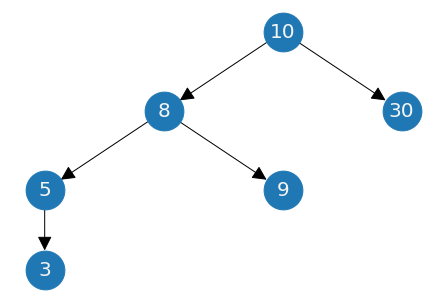

In [ ]:
arvore = ArvoreAvl()

arvore.inserir(NoAvl(10), arvore.raiz)
arvore.inserir(NoAvl(8), arvore.raiz)
arvore.inserir(NoAvl(30), arvore.raiz)

arvore.inserir(NoAvl(5), arvore.raiz)
arvore.inserir(NoAvl(9), arvore.raiz)

arvore.inserir(NoAvl(3), arvore.raiz)


arvore.imprimir()

APÓS A ROTAÇÃO:



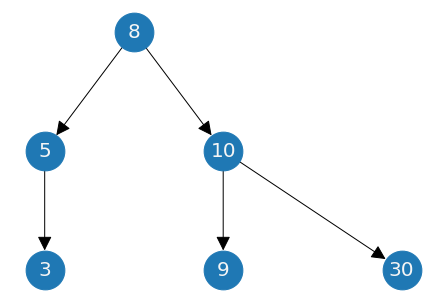

In [ ]:
print("APÓS A ROTAÇÃO:")
print()

nova_arvore = nx.DiGraph()

def reescreve_arvore(nova_arvore, arvore, raiz):

    if not raiz:
         return
         
    if raiz == arvore.raiz:
      nova_arvore.add_node(raiz.info),
      reescreve_arvore(nova_arvore, arvore, raiz.esq)
      reescreve_arvore(nova_arvore, arvore, raiz.dir)
    else:
      nova_arvore.add_edge(raiz.pai.info, raiz.info),
      reescreve_arvore(nova_arvore, arvore, raiz.esq)
      reescreve_arvore(nova_arvore, arvore, raiz.dir)

reescreve_arvore(nova_arvore, arvore, arvore.raiz)

pos = graphviz_layout(nova_arvore, prog="dot")
nx.draw(nova_arvore, pos, with_labels=True, arrows=True, 
                   node_size=1500, arrowsize=30, 
                   font_size=20, font_color="whitesmoke")

# EXEMPLO DE ROTAÇÃO SIMPLES À ESQUERDA

A ARVORE ESTÁ DESBALANCEADA! ROTAÇÃO SIMPLES À ESQUERDA NO PIVÔ 30



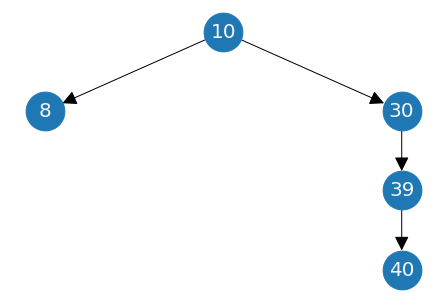

In [ ]:
arvore = ArvoreAvl()

arvore.inserir(NoAvl(10), arvore.raiz)
arvore.inserir(NoAvl(8), arvore.raiz)
arvore.inserir(NoAvl(30), arvore.raiz)

#arvore.inserir(NoAvl(25), arvore.raiz)
arvore.inserir(NoAvl(39), arvore.raiz)

arvore.inserir(NoAvl(40), arvore.raiz)

arvore.imprimir()

APÓS A ROTAÇÃO:



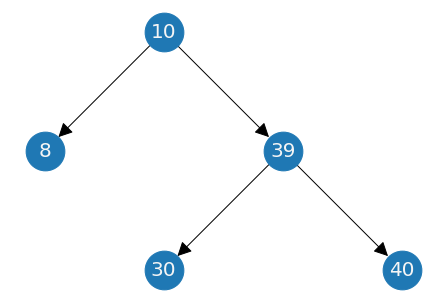

In [ ]:
print("APÓS A ROTAÇÃO:")
print()

nova_arvore = nx.DiGraph()

def reescreve_arvore(nova_arvore, arvore, raiz):

  if not raiz:
        return
        
  if raiz == arvore.raiz:
    nova_arvore.add_node(raiz.info),
    reescreve_arvore(nova_arvore, arvore, raiz.esq)
    reescreve_arvore(nova_arvore, arvore, raiz.dir)
  else:
    nova_arvore.add_edge(raiz.pai.info, raiz.info),
    reescreve_arvore(nova_arvore, arvore, raiz.esq)
    reescreve_arvore(nova_arvore, arvore, raiz.dir)



reescreve_arvore(nova_arvore, arvore, arvore.raiz)

pos = graphviz_layout(nova_arvore, prog="dot")
nx.draw(nova_arvore, pos, with_labels=True, arrows=True, 
                   node_size=1500, arrowsize=30, 
                   font_size=20, font_color="whitesmoke")